# SG Wuhan Network Modelling

#### Author: leebond
#### Data: Ottokyu

#### Date: Feb 2020


## Contents:
1. Overall network graph
2. Most Influential Nodes
3. Most Convenient Nodes

In [1]:
import requests
import json
import re
import networkx as nx
from networkx.readwrite import json_graph
import matplotlib.pyplot as plt

from SGWuhanHelperFunctions import *

In [2]:
%%time
### Kudos to Ottokyu (https://twitter.com/ottokyu) creator of https://sgwuhan.xose.net/ for making the data available
! python getDataFromSgWuhan.py

CPU times: user 210 ms, sys: 67.6 ms, total: 277 ms
Wall time: 11.7 s


In [2]:
import pickle as pkl
with open('./data/sgwuhandata.pkl', 'rb') as f:
    data_dict = pkl.load(f)

### Data Dictionary
the data is stored with the following attributes per record
- each record can be thought of as a node
- a node can be either 
 - a Case that stores case information such as demographics and places visited
 - a Place that stores information of the Cases that had visited

In [3]:
data_dict['data'][0].keys()

dict_keys(['lat', 'lng', 'caseType', 'age', 'gender', 'from', 'stayed', 'visited', 'caseNo', 'citizenship', 'relatedArrayNo', 'mohURL', 'confirmDate', 'location', 'relatedCaseNo'])

## Creating the Network Graph

**Since Case information provides all the necessary information, we will use only the Case records to build the graph** 
### Attributes used to build the graph
- caseNo: the case
- stayed: where the case stayed in Singapore (can be nil)
- visited: places visited by the case (can be nil)
- relatedCaseNo: Case with biological relation to the main Case
- from: Nationality

In [4]:
data_dict['data'][0]

{'lat': 1.2577323,
 'lng': 103.8097962,
 'caseType': 'oldCase',
 'age': '66',
 'gender': 'Male',
 'from': 'China, Wuhan',
 'stayed': "Shangri-La's Rasa Sentosa Resort and Spa",
 'visited': 'Singapore General Hospital',
 'caseNo': '#1',
 'citizenship': 'China',
 'relatedArrayNo': '19',
 'mohURL': 'confirmed-imported-case-of-novel-coronavirus-infection-in-singapore-multi-ministry-taskforce-ramps-up-precautionary-measures',
 'confirmDate': '23 Jan',
 'location': '',
 'relatedCaseNo': ''}

In [18]:
g = nx.Graph()
nodes_to_ignore = ['hospital','gp clinic','polyclinic']
g = loadGraph(g, data_dict, nodes_to_ignore)

### Overall network
- hospitals and gp clinics are removed from the network since they will cause bias in the network analysis

#### Network description
- each node is either a Case or a location
- the edges are non-directed and a link between nodes is present if the Case has been to that location

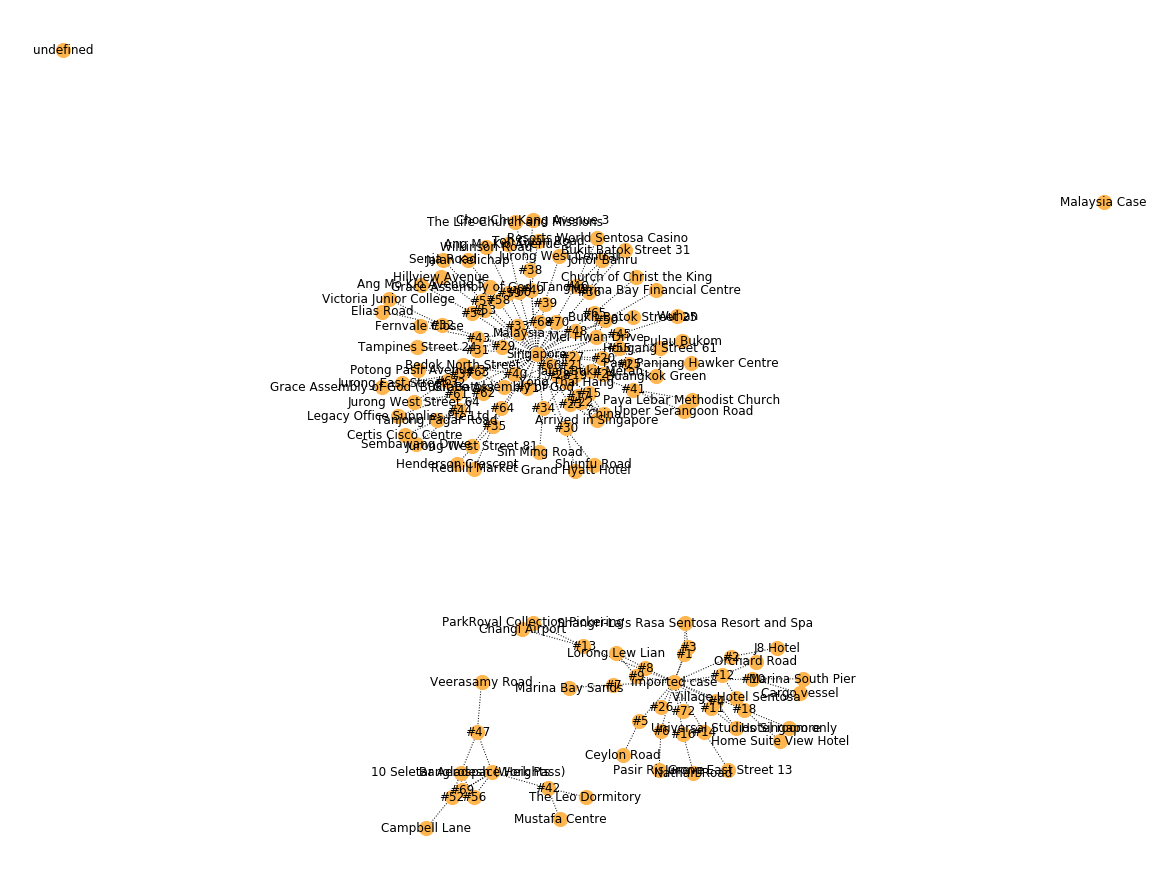

In [19]:
showGraph(g)

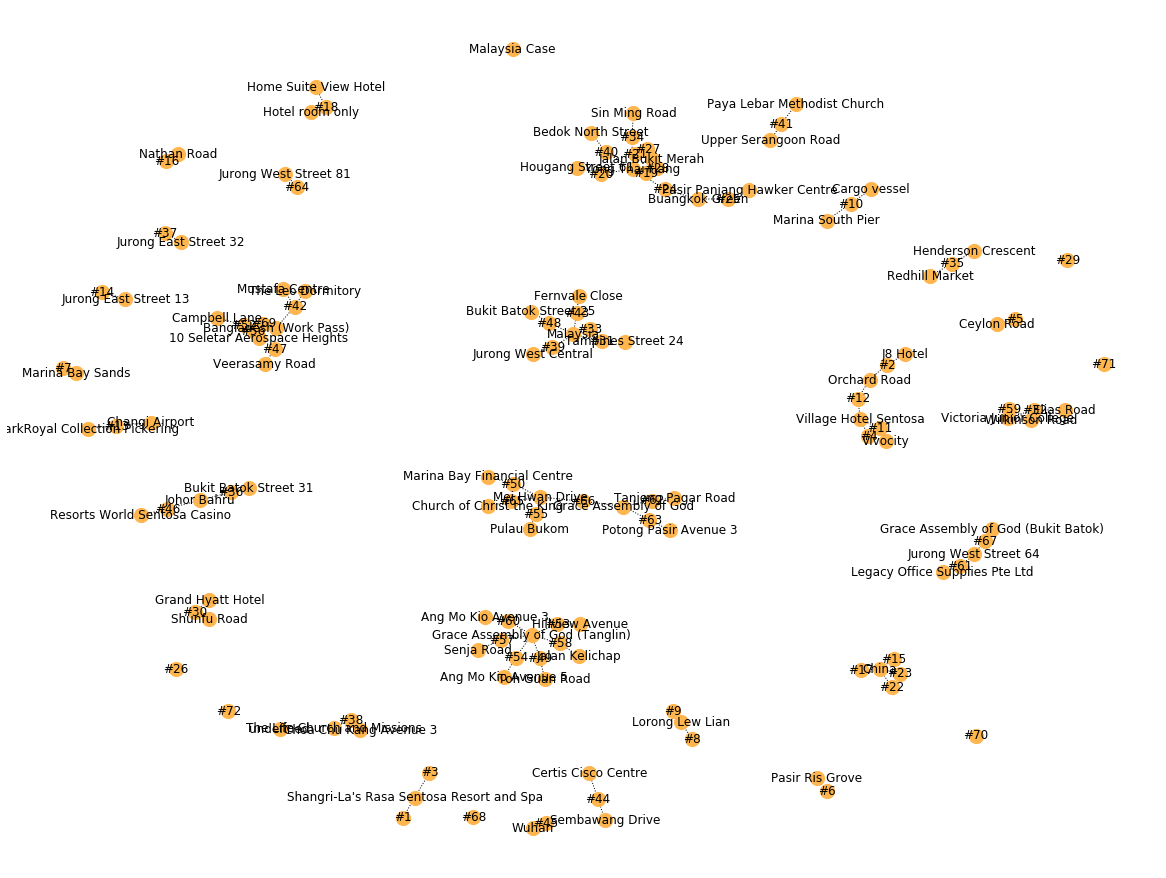

In [20]:
g = nx.Graph()
nodes_to_ignore = ['hospital','gp clinic','polyclinic','singapore','imported case']
g = loadGraph(g, data_dict, nodes_to_ignore)
showGraph(g)

###  10 Most Influential Nodes
- Katz centrality computes the centrality for a node based on the centrality of its neighbors. It is a generalization of the eigenvector centrality

- In other words, it measures how well a node is connected to all other well-connected nodes

- source: https://networkx.github.io/documentation/stable/

In [21]:
katz = getNodeCentrality(g, nx.katz_centrality)

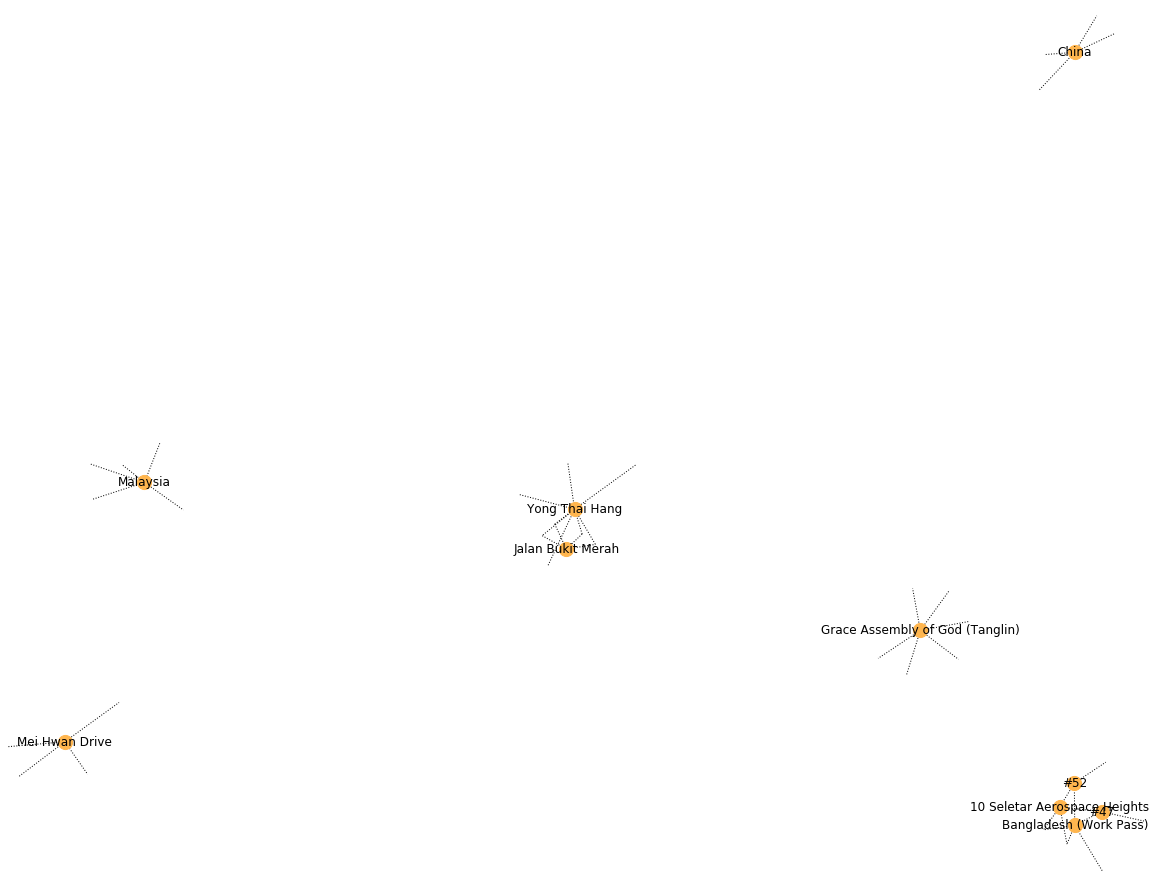

In [22]:
showSubGraph(g, katz, 10)

### 10  Most Convenient Nodes
- Betweenness centrality computes the centrality for a node based on how easy it is for a node to reach another node.
- In other words, it shows how quick each node can jump to another
- source: https://networkx.github.io/documentation/stable/

In [23]:
bet = getNodeCentrality(g, nx.betweenness_centrality)

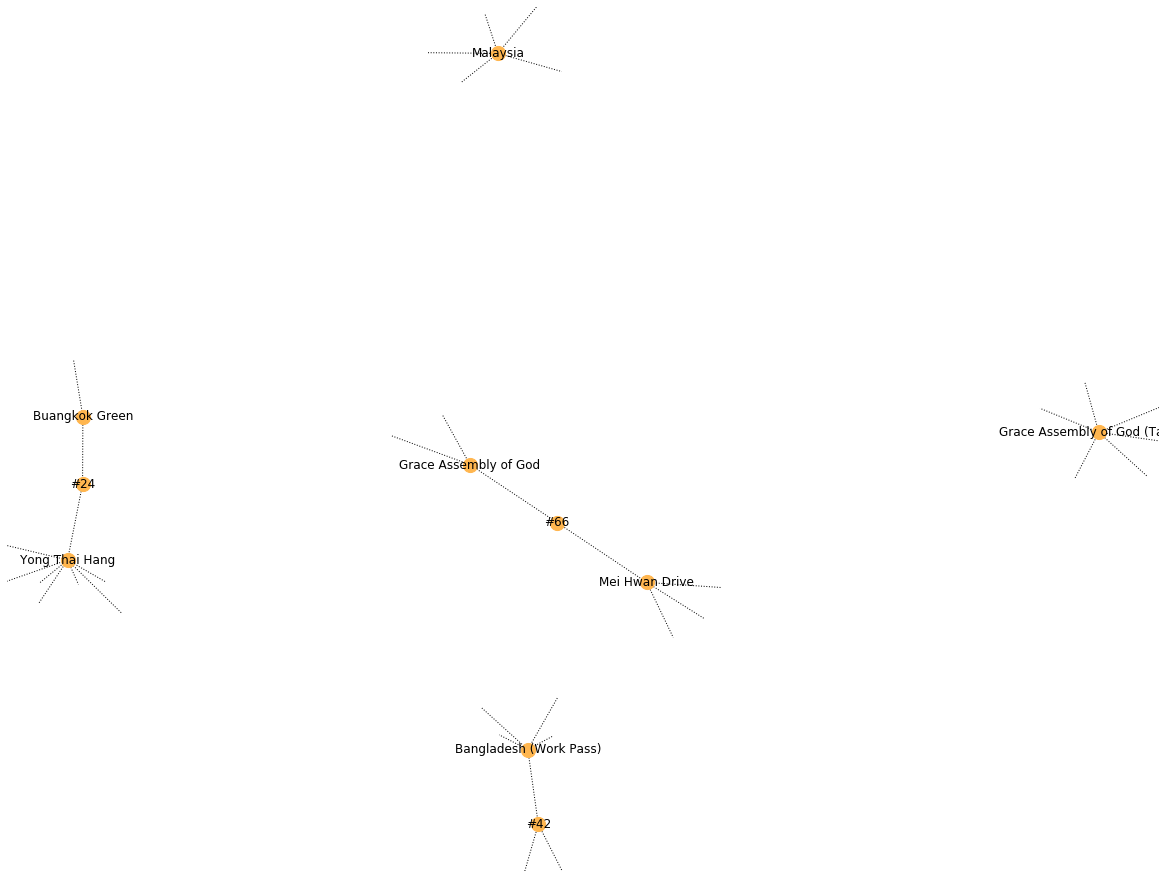

In [24]:
showSubGraph(g, bet, 10)

###  10 Most Centralized Nodes
- The closeness centrality computes the shortest distance to move from one node to another
- In other words, these are nodes that are frequently used for as 'bridges'
- source: https://networkx.github.io/documentation/stable/

In [25]:
clos = getNodeCentrality(g, nx.closeness_centrality)

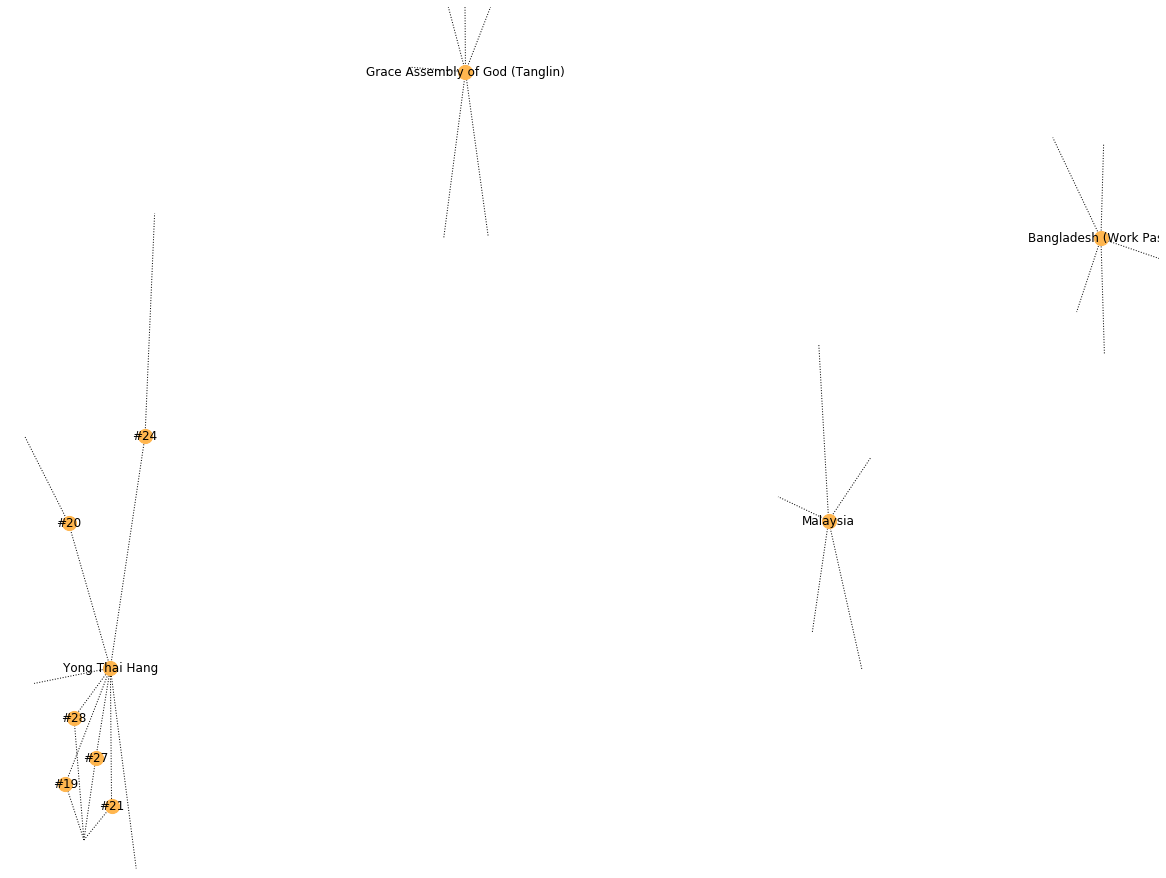

In [26]:
showSubGraph(g, clos, 10)

## Conclusion

- *Case #27* is the most connected individual (10 connected cases and places) thus far of the coronavirus outbreak in Singapore
- *Royal Dragon Restaurant, Meeting You Restaurant, Yong Thai Hang, T Galleria by DFS* are places that are most visited by the infected cases